In [4]:
import pandas as pd
import numpy as np

In [17]:
# 1. Write a Python program to display the first 5 rows from COVID-19 dataset. Also print the dataset information and 
# check the missing values.

df = pd.read_csv('08-19-2021.csv')
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-08-20 04:21:33,33.93911,67.709953,152411,7047,NaN,NaN,Afghanistan,391.516813,4.623682
1,NaN,NaN,NaN,Albania,2021-08-20 04:21:33,41.15330,20.168300,137597,2473,NaN,NaN,Albania,4781.326013,1.797278
2,NaN,NaN,NaN,Algeria,2021-08-20 04:21:33,28.03390,1.659600,190078,4929,NaN,NaN,Algeria,433.462894,2.593146
3,NaN,NaN,NaN,Andorra,2021-08-20 04:21:33,42.50630,1.521800,14981,129,NaN,NaN,Andorra,19389.115382,0.861091
4,NaN,NaN,NaN,Angola,2021-08-20 04:21:33,-11.20270,17.873900,45325,1133,NaN,NaN,Angola,137.907352,2.499724


In [18]:
df.shape

(4014, 14)

In [3]:
df.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3986
Active                 3986
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      42
dtype: int64

In [58]:
dropped_col = ['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio']
df.drop(dropped_col, axis = 1, inplace = True)
df

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Recovered-binned
0,NaN,Afghanistan,152411,7047,NaN,NaN,NaN
1,NaN,Albania,137597,2473,NaN,NaN,NaN
2,NaN,Algeria,190078,4929,NaN,NaN,NaN
3,NaN,Andorra,14981,129,NaN,NaN,NaN
4,NaN,Angola,45325,1133,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4009,Unknown,Ukraine,0,0,0.0,0.0,NaN
4010,NaN,Nauru,0,0,0.0,0.0,NaN
4011,Niue,New Zealand,0,0,0.0,0.0,NaN
4012,NaN,Tuvalu,0,0,0.0,0.0,NaN


In [5]:
# 2.Write a python program to replace all the missing values with “Tobefound” for province column.
df['Province_State'].replace(np.nan, 'Tobefound', inplace = True)

In [13]:
# 3. Find the Z-Score for column “Recovered”
from scipy import stats
stats.zscore(df['Recovered'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4009   NaN
4010   NaN
4011   NaN
4012   NaN
4013   NaN
Name: Recovered, Length: 4014, dtype: float64

In [21]:
# 4. Create bin values for “Recovered” column in the data set.
mybin = np.linspace(df.Recovered.mean(), df.Recovered.max(), 3)
mybin

array([ 43587.25 , 242330.125, 441073.   ])

In [57]:
# 5. Write a Python program to get the maximum number of confirmed, deaths, recovered and active cases of Novel Coronavirus
# (COVID-19) Country wise.
def find_max(var):
    x = df[['Country_Region', var]]
    y = x.groupby(['Country_Region'], as_index = False).sum()
    y.columns = ['Country', 'Number']
    
    for row in y.values.tolist():
        if row[-1] == y.Number.max():
            print(row)
            
var = 'Active'
find_max(var)

['Malaysia', 255537.0]


In [61]:
# 6. Write a Python program to get the total number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19)
# cases Country/Region - Province/State wise
mygroup = df[['Country_Region', 'Province_State', 'Confirmed', 'Deaths', 'Recovered']]
mygroup.groupby(['Country_Region', 'Province_State']).sum()

Confirmed  \
Country_Region Province_State                                            
Australia      Australian Capital Territory                        219   
               New South Wales                                   16353   
               Northern Territory                                  200   
               Queensland                                         1962   
               South Australia                                     869   
...                                                                ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha          4   
               Scotland                                         373143   
               Turks and Caicos Islands                           2588   
               Unknown                                               0   
               Wales                                            258155   

                                                             Deaths  Recovered  
Country_Region Province_State                                                   
Australia      Australian Capital Territory                       3        0.0  
               New South Wales                                  119        0.0  
               Northern Territory                                 0        0.0  
               Queensland                                         7        0.0  
               South Australia                                    4        0.0  
...                                                             ...        ...  
United Kingdom Saint Helena, Ascension and Tristan da Cunha       0        0.0  
               Scotland                                       10544        0.0  
               Turks and Caicos Islands                          19        0.0  
               Unknown                                          201        0.0  
               Wales                                           8039        0.0  

[616 rows x 3 columns]

In [64]:
# 7. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise 
country = df[['Country_Region', 'Deaths', 'Confirmed', 'Recovered', 'Active']]
country = country.groupby(['Country_Region'], as_index = False).sum()

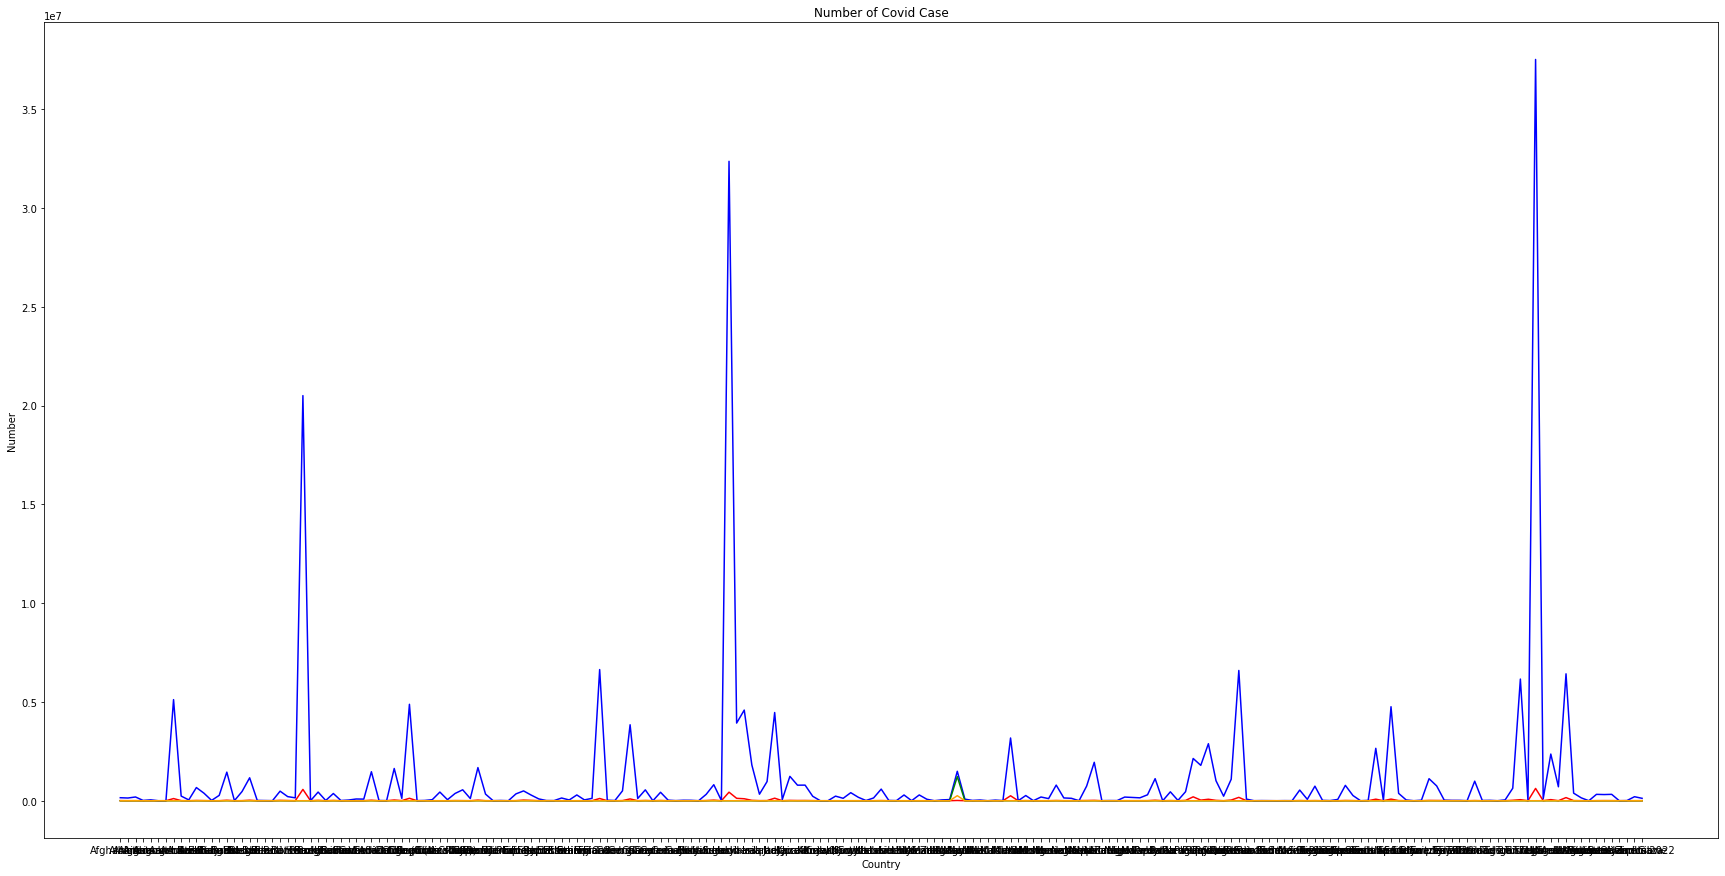

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

width = 30
height = 15


plt.figure(figsize=(width, height))

plt.plot(country.Country_Region, country.Deaths, color = 'red')
plt.plot(country.Country_Region, country.Confirmed, color = 'blue')
plt.plot(country.Country_Region, country.Recovered, color = 'green')
plt.plot(country.Country_Region, country.Active, color = 'orange')
plt.title('Number of Covid Case')
plt.xlabel('Country')
plt.ylabel('Number')

plt.show()